In [2]:
import pandas as pd
import seaborn
from matplotlib import pyplot as plt
#import seaborn as sns
#from matplotlib import pyplot as plt

data = pd.read_excel("rollingsales/rollingsales_statenisland.xls", skiprows=4)
data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
0,5,ANNADALE,01 ONE FAMILY HOMES,1,5395,32,,A1,541 SYCAMORE STREET,,...,1,0,1,13320,4696,1985,1,A1,1200000,2012-08-15
1,5,ANNADALE,01 ONE FAMILY HOMES,1,5401,10,,A2,16 JANSEN STREET,,...,1,0,1,10800,2015,1980,1,A2,705000,2013-02-08
2,5,ANNADALE,01 ONE FAMILY HOMES,1,5401,38,,A1,27 WEAVER STREET,,...,1,0,1,10833,2128,1980,1,A1,127500,2012-09-26
3,5,ANNADALE,01 ONE FAMILY HOMES,1,5407,11,,A1,24 ELMBANK STREET,,...,1,0,1,5000,1520,1910,1,A1,237276,2012-11-29
4,5,ANNADALE,01 ONE FAMILY HOMES,1,5425,39,,A1,23 SANDGAP STREET,,...,1,0,1,2700,684,1950,1,A1,200500,2013-05-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6351,5,WOODROW,02 TWO FAMILY HOMES,1,7349,10,,B9,63 PHEASANT LANE,,...,2,0,2,2590,2450,1998,1,B9,505000,2013-05-15
6352,5,WOODROW,02 TWO FAMILY HOMES,1,7349,35,,B9,33 QUAIL LANE,,...,2,0,2,2255,2377,1998,1,B9,0,2013-04-09
6353,5,WOODROW,02 TWO FAMILY HOMES,1,7351,11,,B2,40 HERRICK AVENUE,,...,2,0,2,4000,2962,2000,1,B2,0,2012-08-01
6354,5,WOODROW,22 STORE BUILDINGS,4,7100,16,,K6,639 VETERANS ROAD WEST,,...,0,1,1,21663,6950,2008,4,K6,1300000,2013-05-29


In [3]:
proccesed_data = data
proccesed_data.columns = [column.lower().replace("\n", "").replace(" ", "_").replace("-", "_") for column in proccesed_data.columns] 
proccesed_data

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease_ment,building_class_at_present,address,apartmentnumber,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,saleprice,sale_date
0,5,ANNADALE,01 ONE FAMILY HOMES,1,5395,32,,A1,541 SYCAMORE STREET,,...,1,0,1,13320,4696,1985,1,A1,1200000,2012-08-15
1,5,ANNADALE,01 ONE FAMILY HOMES,1,5401,10,,A2,16 JANSEN STREET,,...,1,0,1,10800,2015,1980,1,A2,705000,2013-02-08
2,5,ANNADALE,01 ONE FAMILY HOMES,1,5401,38,,A1,27 WEAVER STREET,,...,1,0,1,10833,2128,1980,1,A1,127500,2012-09-26
3,5,ANNADALE,01 ONE FAMILY HOMES,1,5407,11,,A1,24 ELMBANK STREET,,...,1,0,1,5000,1520,1910,1,A1,237276,2012-11-29
4,5,ANNADALE,01 ONE FAMILY HOMES,1,5425,39,,A1,23 SANDGAP STREET,,...,1,0,1,2700,684,1950,1,A1,200500,2013-05-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6351,5,WOODROW,02 TWO FAMILY HOMES,1,7349,10,,B9,63 PHEASANT LANE,,...,2,0,2,2590,2450,1998,1,B9,505000,2013-05-15
6352,5,WOODROW,02 TWO FAMILY HOMES,1,7349,35,,B9,33 QUAIL LANE,,...,2,0,2,2255,2377,1998,1,B9,0,2013-04-09
6353,5,WOODROW,02 TWO FAMILY HOMES,1,7351,11,,B2,40 HERRICK AVENUE,,...,2,0,2,4000,2962,2000,1,B2,0,2012-08-01
6354,5,WOODROW,22 STORE BUILDINGS,4,7100,16,,K6,639 VETERANS ROAD WEST,,...,0,1,1,21663,6950,2008,4,K6,1300000,2013-05-29


In [4]:
saleprice_group = proccesed_data.groupby("saleprice",as_index=False).count()
#saleprice_group
no_null_saleprice = proccesed_data[proccesed_data.saleprice > 0]
no_null_saleprice

def count_saleprice_group(salePrice: int):
    if 1 >= salePrice <= 9999:
        return "1 - 10000"
    elif salePrice >= 10000 and salePrice <= 99999:
        return "10000 - 100000"
#    elif salePrice >= 50000 and salePrice <= 99999:
#        return "50000 - 100000"
    elif salePrice >= 100000 and salePrice <= 499999:
        return "100000 - 500000"
    elif salePrice >= 500000 and salePrice <= 999999:
        return "500000 - 1 000000"
    elif salePrice >= 1000000:
        return "over 1mln"
    
no_null_saleprice = no_null_saleprice.assign(saleprice_category=[count_saleprice_group(salePrice) for salePrice in no_null_saleprice.saleprice.to_list()])
no_null_saleprice

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease_ment,building_class_at_present,address,apartmentnumber,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,saleprice,sale_date,saleprice_category
0,5,ANNADALE,01 ONE FAMILY HOMES,1,5395,32,,A1,541 SYCAMORE STREET,,...,0,1,13320,4696,1985,1,A1,1200000,2012-08-15,over 1mln
1,5,ANNADALE,01 ONE FAMILY HOMES,1,5401,10,,A2,16 JANSEN STREET,,...,0,1,10800,2015,1980,1,A2,705000,2013-02-08,500000 - 1 000000
2,5,ANNADALE,01 ONE FAMILY HOMES,1,5401,38,,A1,27 WEAVER STREET,,...,0,1,10833,2128,1980,1,A1,127500,2012-09-26,100000 - 500000
3,5,ANNADALE,01 ONE FAMILY HOMES,1,5407,11,,A1,24 ELMBANK STREET,,...,0,1,5000,1520,1910,1,A1,237276,2012-11-29,100000 - 500000
4,5,ANNADALE,01 ONE FAMILY HOMES,1,5425,39,,A1,23 SANDGAP STREET,,...,0,1,2700,684,1950,1,A1,200500,2013-05-13,100000 - 500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6348,5,WOODROW,02 TWO FAMILY HOMES,1,7317,82,,B2,110 SHARROTTS ROAD,,...,0,2,5610,1670,1994,1,B2,560000,2013-04-18,500000 - 1 000000
6349,5,WOODROW,02 TWO FAMILY HOMES,1,7317,124,,B2,83 ROBIN COURT,,...,0,2,7525,2160,1994,1,B2,520000,2013-06-18,500000 - 1 000000
6351,5,WOODROW,02 TWO FAMILY HOMES,1,7349,10,,B9,63 PHEASANT LANE,,...,0,2,2590,2450,1998,1,B9,505000,2013-05-15,500000 - 1 000000
6354,5,WOODROW,22 STORE BUILDINGS,4,7100,16,,K6,639 VETERANS ROAD WEST,,...,1,1,21663,6950,2008,4,K6,1300000,2013-05-29,over 1mln


In [5]:
selprice_groupby = no_null_saleprice.groupby("saleprice_category",as_index=False).count()
selprice_groupby

,saleprice_category,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease_ment,building_class_at_present,address,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,saleprice,sale_date
0,1 - 10000,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
1,10000 - 100000,138,138,138,138,138,138,138,138,138,...,138,138,138,138,138,138,138,138,138,138
2,100000 - 500000,2636,2636,2636,2636,2636,2636,2636,2636,2636,...,2636,2636,2636,2636,2636,2636,2636,2636,2636,2636
3,500000 - 1 000000,807,807,807,807,807,807,807,807,807,...,807,807,807,807,807,807,807,807,807,807
4,over 1mln,95,95,95,95,95,95,95,95,95,...,95,95,95,95,95,95,95,95,95,95


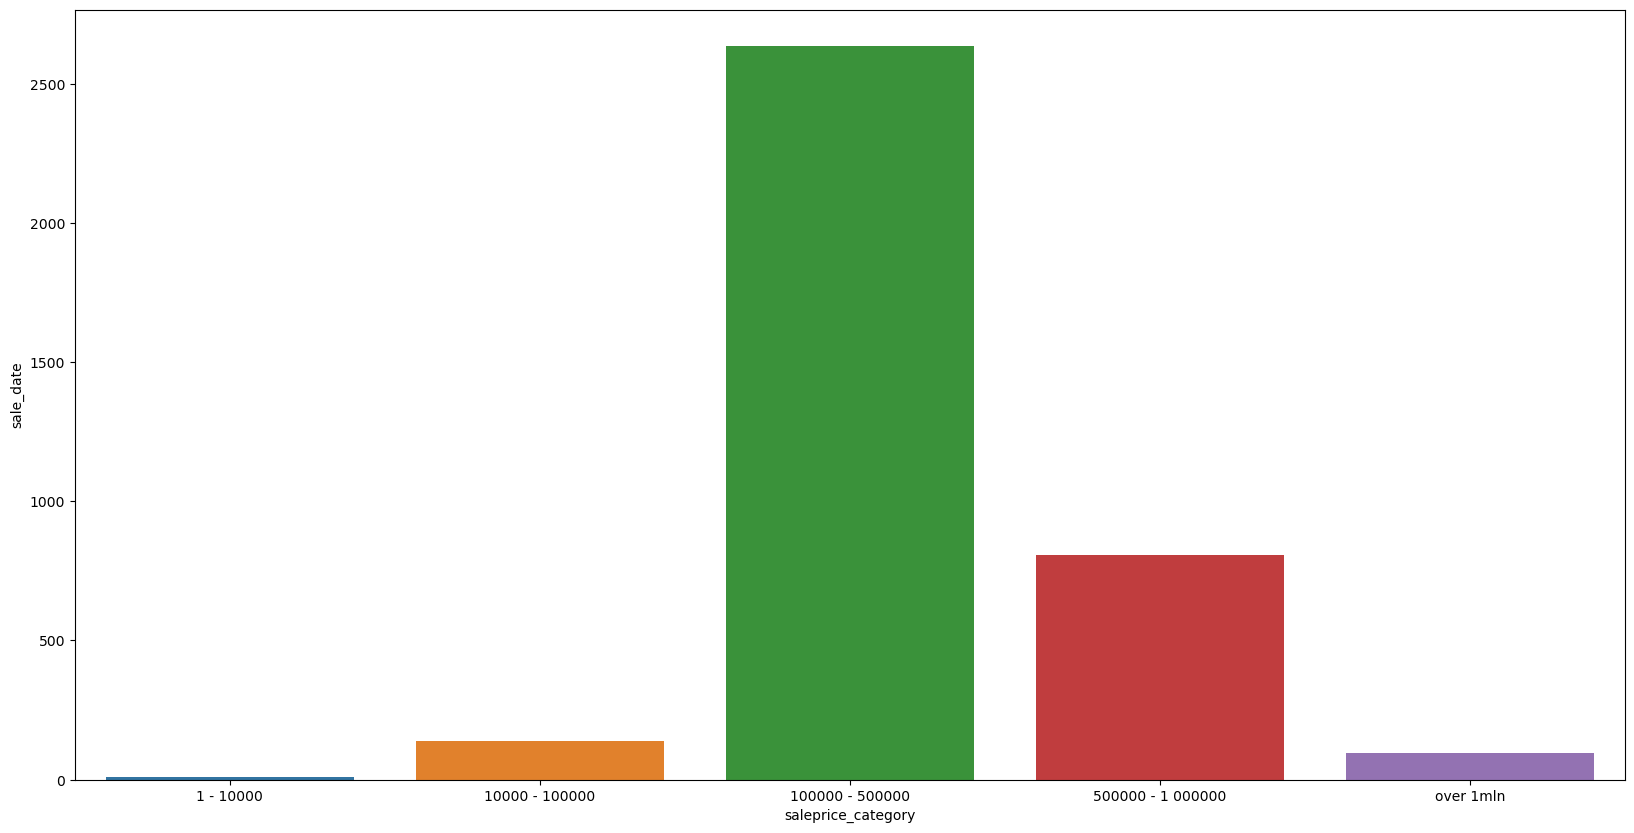

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = seaborn.barplot(data=selprice_groupby, 
                x=selprice_groupby.saleprice_category, 
                y=selprice_groupby.sale_date)

In [7]:
building_class_group =  proccesed_data.groupby("building_class_at_present",as_index=False).count()
building_class_group

,building_class_at_present,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease_ment,address,apartmentnumber,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,saleprice,sale_date
0,,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,A0,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
2,A1,1085,1085,1085,1085,1085,1085,1085,1085,1085,...,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085
3,A2,776,776,776,776,776,776,776,776,776,...,776,776,776,776,776,776,776,776,776,776
4,A3,127,127,127,127,127,127,127,127,127,...,127,127,127,127,127,127,127,127,127,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,W8,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
86,W9,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
87,Z0,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
88,Z7,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [8]:
building_class_letter = ["A", "B", "C", "D", "E","F", "G","H","I","J","K","M","N","O","P","Q","R","S","U","V","W","Z"]
def sort_building_class (buildClass:str):
    checkClass = ""
    for i in building_class_letter:
        if i in buildClass:
            checkClass = i
            break
    return checkClass if checkClass != "" else "other"


no_null_saleprice.insert(3,"build_class_type",[sort_building_class(buildClass) for buildClass in no_null_saleprice.building_class_at_present.to_list()])
no_null_price_with_class_type = no_null_saleprice
no_null_price_with_class_type


#no_null_saleprice = no_null_saleprice.assign(build_class_type=[sort_building_class(buildClass) for buildClass in no_null_saleprice])




#no_null_saleprice = proccesed_data[proccesed_data.saleprice > 0]
#no_null_saleprice
##no_null_saleprice = no_null_saleprice.assign(saleprice_category=[count_saleprice_group(salePrice) for salePrice in no_null_saleprice.saleprice.to_list()])
#no_null_saleprice

,borough,neighborhood,building_class_category,build_class_type,tax_class_at_present,block,lot,ease_ment,building_class_at_present,address,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,saleprice,sale_date,saleprice_category
0,5,ANNADALE,01 ONE FAMILY HOMES,A,1,5395,32,,A1,541 SYCAMORE STREET,...,0,1,13320,4696,1985,1,A1,1200000,2012-08-15,over 1mln
1,5,ANNADALE,01 ONE FAMILY HOMES,A,1,5401,10,,A2,16 JANSEN STREET,...,0,1,10800,2015,1980,1,A2,705000,2013-02-08,500000 - 1 000000
2,5,ANNADALE,01 ONE FAMILY HOMES,A,1,5401,38,,A1,27 WEAVER STREET,...,0,1,10833,2128,1980,1,A1,127500,2012-09-26,100000 - 500000
3,5,ANNADALE,01 ONE FAMILY HOMES,A,1,5407,11,,A1,24 ELMBANK STREET,...,0,1,5000,1520,1910,1,A1,237276,2012-11-29,100000 - 500000
4,5,ANNADALE,01 ONE FAMILY HOMES,A,1,5425,39,,A1,23 SANDGAP STREET,...,0,1,2700,684,1950,1,A1,200500,2013-05-13,100000 - 500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6348,5,WOODROW,02 TWO FAMILY HOMES,B,1,7317,82,,B2,110 SHARROTTS ROAD,...,0,2,5610,1670,1994,1,B2,560000,2013-04-18,500000 - 1 000000
6349,5,WOODROW,02 TWO FAMILY HOMES,B,1,7317,124,,B2,83 ROBIN COURT,...,0,2,7525,2160,1994,1,B2,520000,2013-06-18,500000 - 1 000000
6351,5,WOODROW,02 TWO FAMILY HOMES,B,1,7349,10,,B9,63 PHEASANT LANE,...,0,2,2590,2450,1998,1,B9,505000,2013-05-15,500000 - 1 000000
6354,5,WOODROW,22 STORE BUILDINGS,K,4,7100,16,,K6,639 VETERANS ROAD WEST,...,1,1,21663,6950,2008,4,K6,1300000,2013-05-29,over 1mln


In [9]:
#Age_valueGroup=["18","18-24","25-34","35-44","45-54","55-64","65+"]
#[data_filter_noNullAge[data_filter_noNullAge.AG==value].Impressions.mean() for value in Age_valueGroup]
#building_class_letter
#check_group = ["A", "B", "C", "D", "E","F", "G","H","I","J","K","M","N","O","P","Q","R","S","U","V","W","Z"]
#[no_null_saleprice[no_null_saleprice.build_class_type==value].saleprice.mean() for value in check_group]
#ass_suka = [no_null_saleprice[no_null_saleprice.build_class_type==value].saleprice.mean() for value in check_group]
#ass_suka

##fig = plt.figure(1, figsize=(9, 6))
#ax = fig.add_subplot(111)    
#bp = ax.boxplot(ass_suka, showmeans=True)

#plt.show()

#group_by_type_building = no_null_saleprice.groupby(["quarter_group","build_class_type"], as_index=False)
#fig, ax=plt.subplots(figsize=(15,5))

#group_by_type_building_sum = group_by_type_building.sum()

#ax=seaborn.barplot(data=group_by_type_building_sum,
#                x=group_by_type_building_sum.build_class_type,
#                y=group_by_type_building_sum.saleprice,
 #               hue=group_by_type_building_sum.quarter_group,
 #               zorder=2)

#no_null_saleprice.insert(len(no_null_saleprice.columns)-1, "quarter_group", [str(value.quarter) + "-quarter" for value in no_null_saleprice.sale_date.to_list()])
#no_null_saleprice

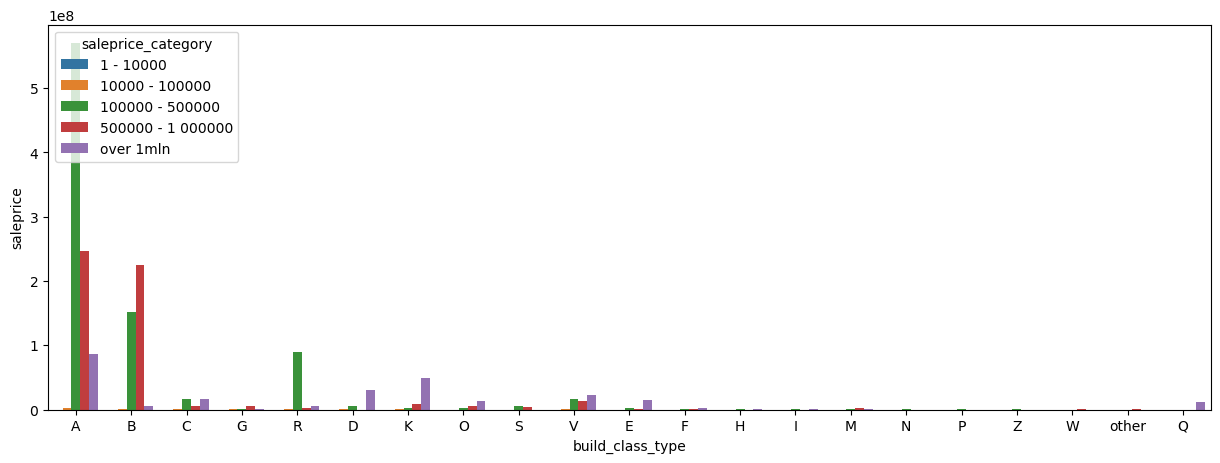

In [10]:
group_by_type_building = no_null_saleprice.groupby(["saleprice_category","build_class_type"], as_index=False)
fig, ax=plt.subplots(figsize=(15,5))

group_by_type_building_sum = group_by_type_building.sum()
#group_by_type_building_sum

ax=seaborn.barplot(data=group_by_type_building_sum,
                x=group_by_type_building_sum.build_class_type,
                y=group_by_type_building_sum.saleprice,
                hue=group_by_type_building_sum.saleprice_category)

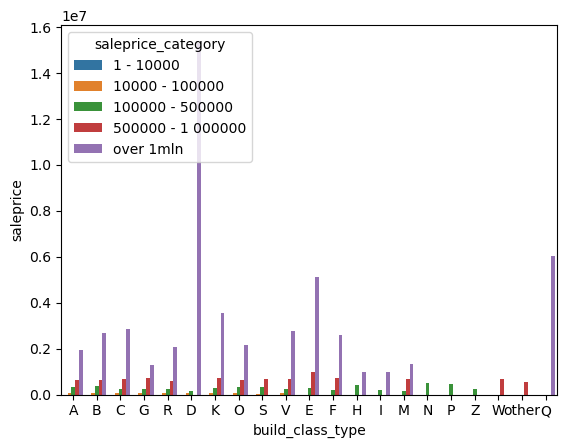

In [11]:
group_by_type_building_mean = group_by_type_building.mean()

ax2=seaborn.barplot(data=group_by_type_building_mean,
                x=group_by_type_building_mean.build_class_type,
                y=group_by_type_building_mean.saleprice,
                hue=group_by_type_building_mean.saleprice_category,
                zorder=2)

<AxesSubplot:xlabel='sale_date', ylabel='date'>

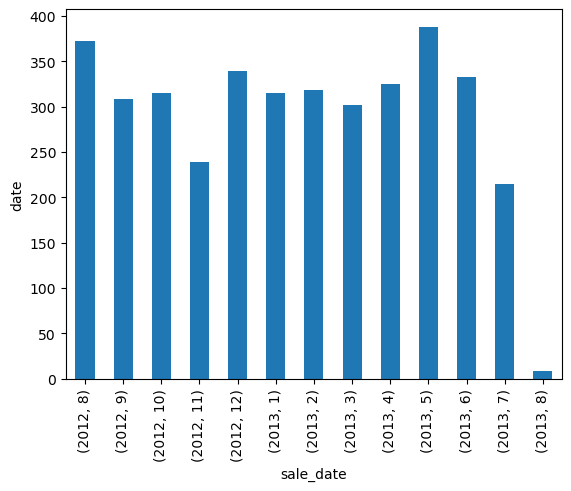

In [12]:
#test = data.groupby([data["sale_date"].dt.year, data["sale_date"].dt.month],group_keys=True)["saleprice"].sum()
# test.sale_date
#test.plot(kind = "bar", xlabel="date", ylabel="sale_date")

group_by_build_class_type = no_null_saleprice.groupby([no_null_saleprice["sale_date"].dt.year, no_null_saleprice["sale_date"].dt.month],group_keys=True)["build_class_type"].count()
group_by_build_class_type.plot(kind = "bar", xlabel="sale_date", ylabel="date")


In [13]:
build_class_type_A = no_null_saleprice.drop(no_null_saleprice[no_null_saleprice.build_class_type != "A"].index)
build_class_type_A

,borough,neighborhood,building_class_category,build_class_type,tax_class_at_present,block,lot,ease_ment,building_class_at_present,address,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,saleprice,sale_date,saleprice_category
0,5,ANNADALE,01 ONE FAMILY HOMES,A,1,5395,32,,A1,541 SYCAMORE STREET,...,0,1,13320,4696,1985,1,A1,1200000,2012-08-15,over 1mln
1,5,ANNADALE,01 ONE FAMILY HOMES,A,1,5401,10,,A2,16 JANSEN STREET,...,0,1,10800,2015,1980,1,A2,705000,2013-02-08,500000 - 1 000000
2,5,ANNADALE,01 ONE FAMILY HOMES,A,1,5401,38,,A1,27 WEAVER STREET,...,0,1,10833,2128,1980,1,A1,127500,2012-09-26,100000 - 500000
3,5,ANNADALE,01 ONE FAMILY HOMES,A,1,5407,11,,A1,24 ELMBANK STREET,...,0,1,5000,1520,1910,1,A1,237276,2012-11-29,100000 - 500000
4,5,ANNADALE,01 ONE FAMILY HOMES,A,1,5425,39,,A1,23 SANDGAP STREET,...,0,1,2700,684,1950,1,A1,200500,2013-05-13,100000 - 500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6288,5,WOODROW,01 ONE FAMILY HOMES,A,1,7319,39,,A5,200 PEMBROOK LOOP,...,0,1,1980,1920,1993,1,A5,386000,2013-02-01,100000 - 500000
6289,5,WOODROW,01 ONE FAMILY HOMES,A,1,7339,35,,A5,42 SONIA COURT,...,0,1,3020,2550,1997,1,A5,450000,2013-04-15,100000 - 500000
6290,5,WOODROW,01 ONE FAMILY HOMES,A,1,7349,47,,A1,447 ENGLEWOOD AVENUE,...,0,1,4000,1367,1930,1,A1,3250000,2012-12-27,over 1mln
6291,5,WOODROW,01 ONE FAMILY HOMES,A,1,7355,21,,A1,83 CHURCHILL AVENUE,...,0,1,4377,2280,2001,1,A1,473607,2012-08-14,100000 - 500000


In [14]:
target_category_A = build_class_type_A.drop(build_class_type_A[build_class_type_A.saleprice_category != "100000 - 500000"].index)
target_category_A

,borough,neighborhood,building_class_category,build_class_type,tax_class_at_present,block,lot,ease_ment,building_class_at_present,address,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,saleprice,sale_date,saleprice_category
2,5,ANNADALE,01 ONE FAMILY HOMES,A,1,5401,38,,A1,27 WEAVER STREET,...,0,1,10833,2128,1980,1,A1,127500,2012-09-26,100000 - 500000
3,5,ANNADALE,01 ONE FAMILY HOMES,A,1,5407,11,,A1,24 ELMBANK STREET,...,0,1,5000,1520,1910,1,A1,237276,2012-11-29,100000 - 500000
4,5,ANNADALE,01 ONE FAMILY HOMES,A,1,5425,39,,A1,23 SANDGAP STREET,...,0,1,2700,684,1950,1,A1,200500,2013-05-13,100000 - 500000
5,5,ANNADALE,01 ONE FAMILY HOMES,A,1,6205,16,,A5,93 EAGAN AVENUE,...,0,1,1546,1579,1986,1,A5,348000,2013-06-20,100000 - 500000
7,5,ANNADALE,01 ONE FAMILY HOMES,A,1,6205,126,,A5,20 MAY PLACE,...,0,1,2475,2495,1986,1,A5,380000,2012-08-16,100000 - 500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6287,5,WOODROW,01 ONE FAMILY HOMES,A,1,7319,33,,A5,188 PEMBROOK LOOP,...,0,1,2120,1960,1993,1,A5,370000,2013-03-11,100000 - 500000
6288,5,WOODROW,01 ONE FAMILY HOMES,A,1,7319,39,,A5,200 PEMBROOK LOOP,...,0,1,1980,1920,1993,1,A5,386000,2013-02-01,100000 - 500000
6289,5,WOODROW,01 ONE FAMILY HOMES,A,1,7339,35,,A5,42 SONIA COURT,...,0,1,3020,2550,1997,1,A5,450000,2013-04-15,100000 - 500000
6291,5,WOODROW,01 ONE FAMILY HOMES,A,1,7355,21,,A1,83 CHURCHILL AVENUE,...,0,1,4377,2280,2001,1,A1,473607,2012-08-14,100000 - 500000


<AxesSubplot:xlabel='neighborhood', ylabel='Amount'>

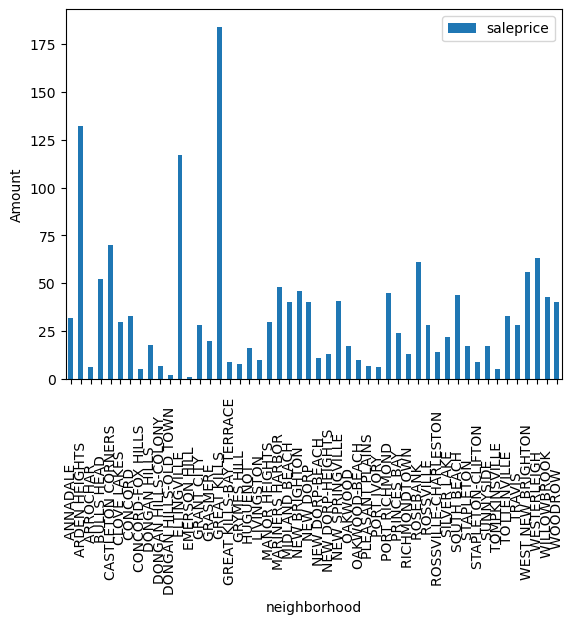

In [15]:
# selprice_groupby = no_null_saleprice.groupby("saleprice_category",as_index=False).count()
# selprice_groupby

# fig, group_data_by_year = plt.subplots(figsize=(10,5))
# group_data_by_year = clean_data.groupby([clean_data["sale_date"].dt.year, clean_data["sale_date"].dt.month],group_keys=True)["saleprice"].sum()
# group_data_by_year.plot(xlabel="Year and month", ylabel="Sum of sale price")

target_category_A_groupby_neighborhood = target_category_A.groupby("neighborhood" ,group_keys=True)[["saleprice"]].count()
target_category_A_groupby_neighborhood.plot(kind = "bar", xlabel="neighborhood", ylabel="Amount")



In [16]:
# target_category_A = build_class_type_A.drop(build_class_type_A[build_class_type_A.saleprice_category != "100000 - 500000"].index)
# target_category_A

target_category_A_in_GREAT_KILLS = target_category_A.drop(target_category_A[target_category_A.lot != "38"].index)
target_category_A_in_GREAT_KILLS

,borough,neighborhood,building_class_category,build_class_type,tax_class_at_present,block,lot,ease_ment,building_class_at_present,address,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,saleprice,sale_date,saleprice_category
